In [1]:
import pandas as pd
models = ['LXMERT','CLIP','FLAVA','SigLip']
df = pd.read_pickle("../comparison_metrics/1_all_xai_maps_with_human.pickle")
df

,filename,index,img_path,caption,foil,linguistic_phenomena,model_shap_map,n_image_variants,model,model_shap_positive_normalized,human_map
1,licking_291.jpg,1,../../VALSE_data/images/swig/licking_291.jpg,A cow licks its fur.,A cow wrinkles its fur.,actions,"[[-0.055763863715583284, 0.022721240122336894,...",172,LXMERT,"[[0.07359886674465907, 0.02998819329604594, 0....","[[0.0014743265527438847, 0.01573516504970489, ..."
2,counting_103.jpg,2,../../VALSE_data/images/swig/counting_103.jpg,A person counts money.,A person pays money.,actions,"[[-0.0010253147265757434, 0.001289952102524694...",172,LXMERT,"[[0.10524416414966785, 0.13240805706235903, 0....","[[0.004482754295119378, 0.029023927486055416, ..."
3,v7w_2411632.jpg,3,../../VALSE_data/images/v7w/v7w_2411632.jpg,There are no people in the photo.,There is at least one person in the photo.,existence,"[[0.000928994850255549, -0.011200517765246332,...",172,LXMERT,"[[0.005573892832708572, 0.0672021870488928, 0....","[[7.25101021142701e-07, 0.006881846083901585, ..."
4,urinating_251.jpg,4,../../VALSE_data/images/swig/urinating_251.jpg,A man urinates against a wall.,A man skates against a wall.,actions,"[[0.022377102646714775, 0.10345780447460129, -...",172,LXMERT,"[[0.0298257918219853, 0.13789591026754916, 0.0...","[[0.012884411289709949, 0.0253810418266228, 0...."
5,v7w_2390850.jpg,5,../../VALSE_data/images/v7w/v7w_2390850.jpg,There are no people in the water.,There is at least one person in the water.,existence,"[[0.018459939998592745, 0.02855476230934073, -...",172,LXMERT,"[[0.034739605778902866, 0.05373696695722698, 0...","[[0.04304823942671234, 0.3141493061042169, 0.2..."
...,...,...,...,...,...,...,...,...,...,...,...
391,v7w_2363335.jpg,94,../../VALSE_data/images/v7w/v7w_2363335.jpg,There is a mast on the closest boat.,There is no mast on the closest boat.,existence,"[[0.05296492576599121, -0.05216550827026367, -...",172,FLAVA,"[[0.10762498903891778, 0.10600056876510631, 0....","[[0.0, 0.0, 0.0, 0.0], [0.0038761918414842236,..."
392,v7w_2367084.jpg,95,../../VALSE_data/images/v7w/v7w_2367084.jpg,There is a giraffe.,There is no giraffe.,existence,"[[0.7628903388977051, -0.021378040313720703, -...",172,FLAVA,"[[0.11606520796315897, 0.0032524290430023346, ...","[[0.058031671761254025, 0.011923543607465443, ..."
393,v7w_2373121.jpg,96,../../VALSE_data/images/v7w/v7w_2373121.jpg,There are no clouds in the sky.,There is at least one cloud in the sky.,existence,"[[-0.5447151064872742, -0.09526211023330688, -...",172,FLAVA,"[[0.1333684719184068, 0.02332404943837514, 0.0...","[[0.06944438863843619, 0.3078465814086114, 0.2..."
394,v7w_2390850.jpg,97,../../VALSE_data/images/v7w/v7w_2390850.jpg,There are no people in the water.,There is at least one person in the water.,existence,"[[-0.042334675788879395, 0.08342540264129639, ...",172,FLAVA,"[[0.010906337368241143, 0.021492206313915848, ...","[[0.04304823942671234, 0.3141493061042169, 0.2..."


# In this file we make some modifications to better test whether the shuffling of human maps works as expected

### Define rank correlation function

In [2]:
from scipy.stats import spearmanr

def rank_correlation(map1, map2):
    flat1, flat2 = map1.ravel(), map2.ravel()
    correlation, p = spearmanr(flat1, flat2)
    return correlation

### Calculate unperturbed rank correlations for each model

In [3]:
rank_correlations_for_model = {}
for model in models:
    # load data for this model
    filter_df = df[df['model']==model]
    human_maps = list(filter_df['human_map'])
    shap_maps = list(filter_df['model_shap_positive_normalized'])

    rank_cors = [rank_correlation(human_map, shap_map) for human_map, shap_map in zip(human_maps, shap_maps)]

    rank_correlations_for_model[model] = rank_cors

rank_correlations_for_model.keys()

dict_keys(['LXMERT', 'CLIP', 'FLAVA', 'SigLip'])

In [4]:
rank_correlations_for_model['CLIP']

[0.7081675768804221,
 0.18823529411764706,
 0.32647058823529407,
 0.4588235294117647,
 -0.0058823529411764705,
 0.5783666024954182,
 0.4974247115609448,
 0.31176470588235294,
 0.2781457706657355,
 0.2064905739204459,
 0.16886744558374442,
 0.37058823529411766,
 0.2411764705882353,
 0.24705882352941175,
 0.3205882352941176,
 -0.1323529411764706,
 0.14963373486385487,
 0.3522780460756539,
 -0.26176470588235295,
 0.6194717217613376,
 0.35000000000000003,
 -0.14411764705882352,
 0.47682132114126075,
 0.07358353721315752,
 0.13529411764705881,
 -0.411764705882353,
 0.049999999999999996,
 0.10294117647058824,
 0.5489331876101552,
 -0.09117647058823529,
 0.5794117647058823,
 -0.044781107551989906,
 0.3923320904488472,
 0.1647058823529412,
 0.047058823529411764,
 0.21339225791815683,
 0.445429666599819,
 0.7763175947392074,
 0.19411764705882353,
 0.5470588235294118,
 -0.33529411764705885,
 0.21176470588235297,
 0.6048566758921547,
 0.6823529411764706,
 0.4058823529411764,
 0.4915380285838923,


#### Is this distribution significantly different from 0? Perform a one-sample t-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

Equation is here: https://www.britannica.com/science/Students-t-test

In [5]:
from scipy import stats
import numpy as np

for model in models:    

    scores = rank_correlations_for_model[model]
    n = len(scores)

    print(f"Performing t-test for RCavg != 0 for RC scores of {model}")

    # perform t test to test against null hypothesis that rank correlation comes from population mean of 0.0 -- i.e. uncorrelated
    t_statistic, p_value = stats.ttest_1samp(a=scores, popmean=0)

    # print the results
    print(f"{model} T-statistic: {t_statistic:.3f}, P-value: {p_value:.15f}\n")

Performing t-test for RCavg != 0 for RC scores of LXMERT
LXMERT T-statistic: 8.663, P-value: 0.000000000000160

Performing t-test for RCavg != 0 for RC scores of CLIP
CLIP T-statistic: 7.601, P-value: 0.000000000025482

Performing t-test for RCavg != 0 for RC scores of FLAVA
FLAVA T-statistic: 9.354, P-value: 0.000000000000006

Performing t-test for RCavg != 0 for RC scores of SigLip
SigLip T-statistic: 7.622, P-value: 0.000000000023062



### Define functions for determining whether two lists of arrays contain the exact same arrays or not

In [41]:
def convert_and_sort(array_list):
    # each becomes sorted list of tuples (we use string representations)
    sorted_arrays = [''.join(map(str, np.sort(arr.ravel()))) for arr in array_list]
    sorted_arrays.sort()
    return sorted_arrays

def compare_array_lists(list1, list2):
    # compare two lists of arrays to see if they contain same elements in different orders
    sorted_list1 = convert_and_sort(list1)
    sorted_list2 = convert_and_sort(list2)
    # same list? yes or no
    return sorted_list1 == sorted_list2

### Calculate PERMUTED rank correlations for each model

Here we will save the AVERAGE for each of 1000 versions of the human_maps order

In [44]:
from collections import defaultdict
import numpy as np


perturbed_avg_rank_correlations = defaultdict(list)


for model in models:
    # load data for this model
    filter_df = df[df['model']==model]
    shap_maps = list(filter_df['model_shap_positive_normalized'])

    # SHUFFLE order of human maps 10000 times and calculate avg rank correlation
    for i in range(40):

        # index at which to start shuffling (out of 92 total maps)
        cut_index = 0

        human_maps = list(filter_df['human_map'])
        human_maps_shuffled = np.array(human_maps[cut_index:]).copy()

        # SHUFFLE  and calculate rank correlation between shuffled list and shap maps

        np.random.shuffle(human_maps_shuffled)

        final_list_of_human_maps = list(human_maps)[:cut_index]+list(human_maps_shuffled)

        print(f"Shuffled list of maps contains same arrays as original human list? {compare_array_lists(final_list_of_human_maps, human_maps)}")

        rank_cors = [rank_correlation(human_map, shap_map) for human_map, shap_map in zip(final_list_of_human_maps, shap_maps)]
        # save average from this run to this model's average RC values
    
        perturbed_avg_rank_correlations[model] += [np.mean(rank_cors)]

perturbed_avg_rank_correlations.keys()

Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human list? True
Shuffled list of maps contains same arrays as original human lis

dict_keys(['LXMERT', 'CLIP', 'FLAVA', 'SigLip'])

### Some graphs and statistical analysis of RQ1.2

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_48691/3163223419.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distribution1, ax=axs[0], shade=True, color="blue", label="Rank correlation for individual stimulus")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_48691/3163223419.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distribution2, ax=axs[1], shade=True, color="red", label = "Average rank correlation per permutation")


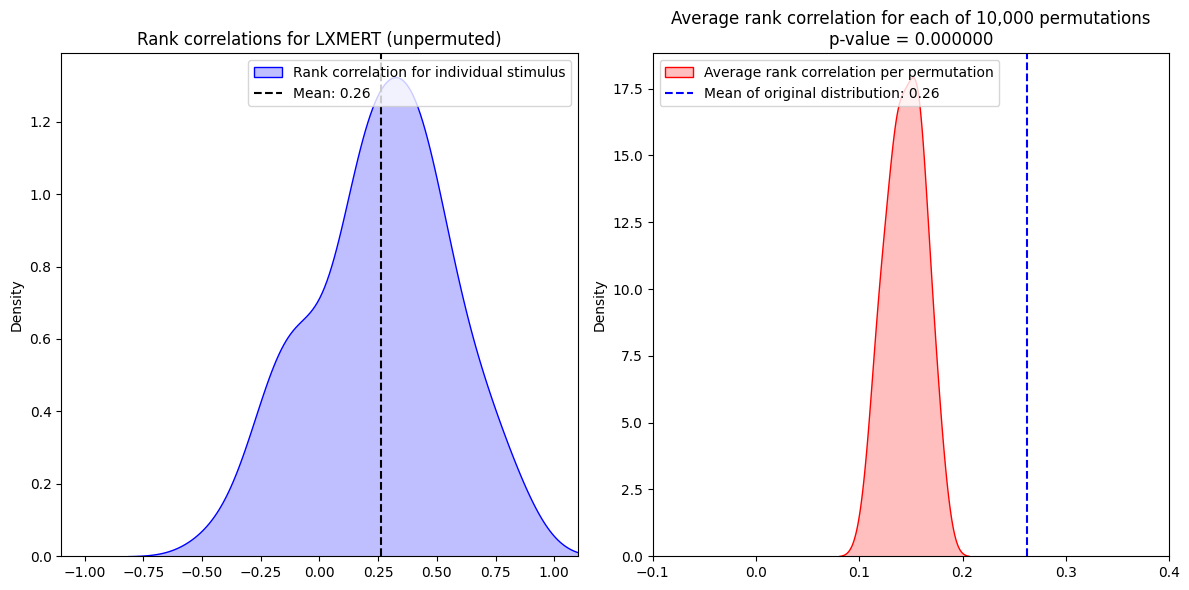

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_48691/3163223419.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distribution1, ax=axs[0], shade=True, color="blue", label="Rank correlation for individual stimulus")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_48691/3163223419.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distribution2, ax=axs[1], shade=True, color="red", label = "Average rank correlation per permutation")


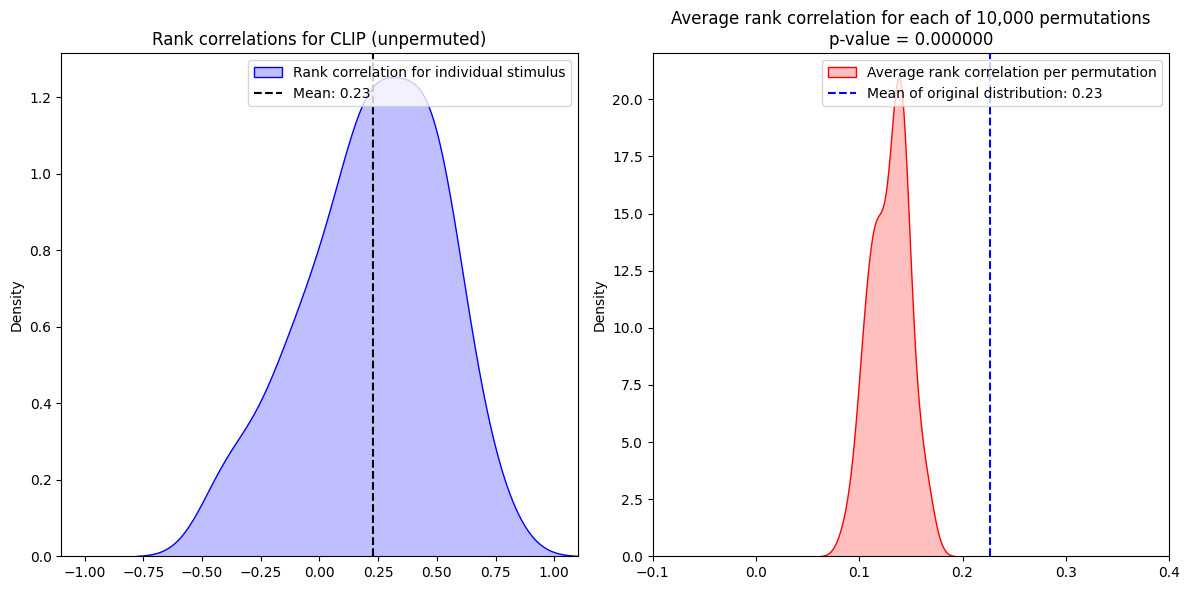

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_48691/3163223419.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distribution1, ax=axs[0], shade=True, color="blue", label="Rank correlation for individual stimulus")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_48691/3163223419.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distribution2, ax=axs[1], shade=True, color="red", label = "Average rank correlation per permutation")


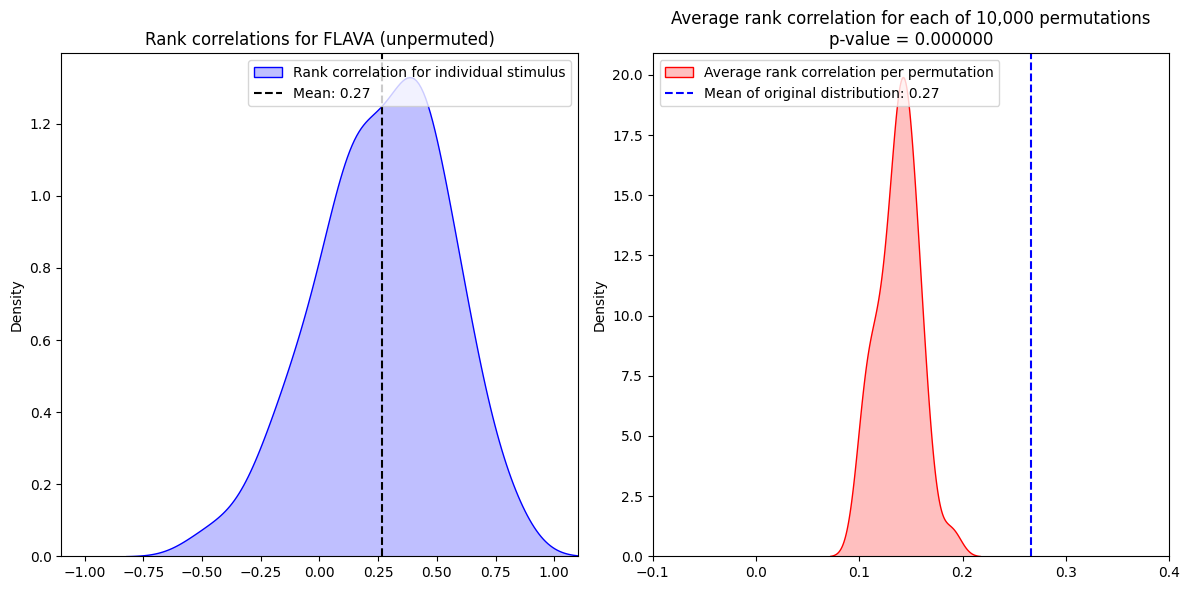

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_48691/3163223419.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distribution1, ax=axs[0], shade=True, color="blue", label="Rank correlation for individual stimulus")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_48691/3163223419.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distribution2, ax=axs[1], shade=True, color="red", label = "Average rank correlation per permutation")


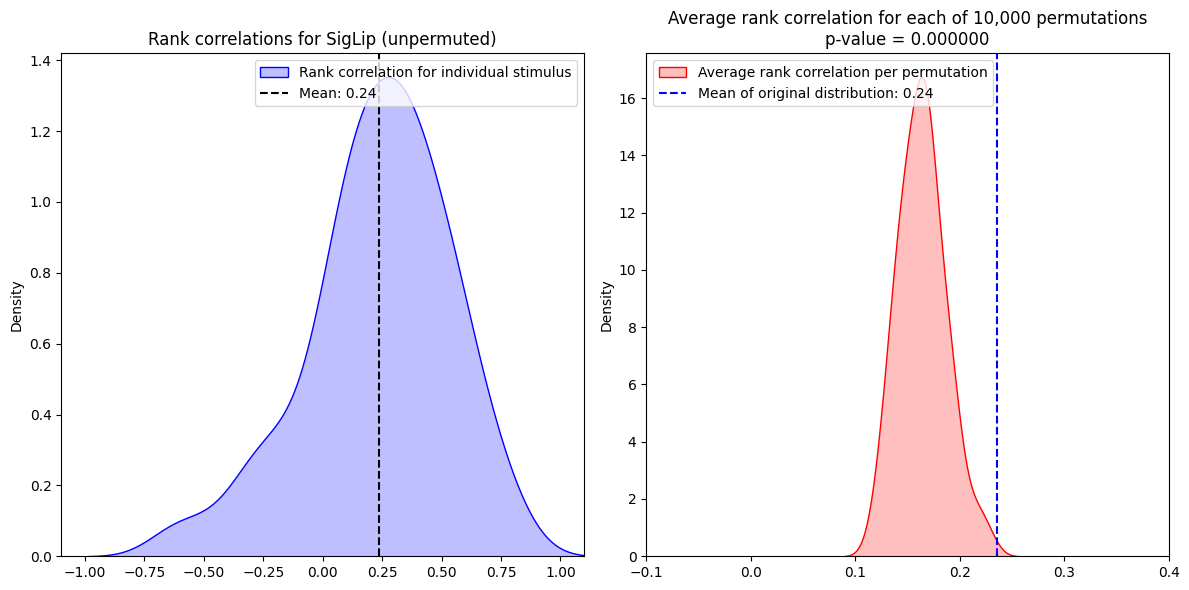

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

for model in models:

    # this is just the distribution of actual rank correlations for that model
    distribution1 = rank_correlations_for_model[model]
    mean_distribution1 = np.mean(distribution1)

    # this will be the AVERAGE rank correlation distribution out of 1000 runs of permutations of the data
    distribution2 = perturbed_avg_rank_correlations[model]

    # generate p value: the PROPORTION of distribution2 which is greater than the average for distribution1
    pval = sum(x >= mean_distribution1 for x in distribution2) / len(distribution2)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # First subplot: KDE for both distributions
    sns.kdeplot(distribution1, ax=axs[0], shade=True, color="blue", label="Rank correlation for individual stimulus")
    axs[0].axvline(mean_distribution1, color="black", linestyle="--", label=f"Mean: {mean_distribution1:.2f}")
    axs[0].legend()
    axs[0].set_xlim([-1.1, 1.1])

    axs[0].set_title(f'Rank correlations for {model} (unpermuted)')

    # Second subplot: KDE for the second distribution with the mean of the first as a line
    sns.kdeplot(distribution2, ax=axs[1], shade=True, color="red", label = "Average rank correlation per permutation")
    axs[1].axvline(mean_distribution1, color="blue", linestyle="--", label=f"Mean of original distribution: {mean_distribution1:.2f}")
    axs[1].legend()
    axs[1].set_xlim([-0.1, 0.4])
    axs[1].set_title(f'Average rank correlation for each of 10,000 permutations\np-value = {pval:.6f}')

    plt.tight_layout()
    plt.show()

In [ ]:
Inst